In [1]:
# Download the libraries if you don't have
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ---------------------------------------- 151.7/151.7 kB 8.8 MB/s eta 0:00:00


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 400)

In [13]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\\kozmos.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [17]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [19]:
df.shape

(5611, 4)

In [21]:
# Convert Text to Lowercase
df['Review'] = df['Review'].str.lower()
df['Review'].head(10)

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
5                           looks different then photo
6    was exactly what i was looking for. heavy mate...
7    looking at the picture, i thought these curtai...
8    much whiter than i thought it would be and was...
9    these are curtains just as the picture shows. ...
Name: Review, dtype: object

In [23]:
# Punctuations
df['Review'] = df['Review'].str.replace(r'[^\w\s]', '', regex=True)
df['Review'].head(10)

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windowsbr imagery ...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i cant believe the qua...
5                           looks different then photo
6    was exactly what i was looking for heavy mater...
7    looking at the picture i thought these curtain...
8    much whiter than i thought it would be and was...
9    these are curtains just as the picture shows t...
Name: Review, dtype: object

In [27]:
# Replace Numbers with a Space
df['Review']=df['Review'].str.replace('\d','',regex=True)
df['Review'].head(10)

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windowsbr imagery ...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i cant believe the qua...
5                           looks different then photo
6    was exactly what i was looking for heavy mater...
7    looking at the picture i thought these curtain...
8    much whiter than i thought it would be and was...
9    these are curtains just as the picture shows t...
Name: Review, dtype: object

In [29]:
# Stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [31]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['Review'].head(10)

0                                                happy
1      good quality material however panels mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria es que sean un poco mas ...
4    great bang buck cant believe quality material ...
5                                looks different photo
6    exactly looking heavy material great price shi...
7    looking picture thought curtains would thinner...
8    much whiter thought would wasnt really expecti...
9    curtains picture shows rd set ambesonne curtai...
Name: Review, dtype: object

In [33]:
# Rarewords
del_ = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in del_))

In [35]:
# Lemmatization
nltk.download('punkt')
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Review'].head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
5                                 look different photo
6    exactly looking heavy material great price shi...
7    looking picture thought curtain would thinner ...
8    much whiter thought would wasnt really expecti...
9    curtain picture show rd set ambesonne curtain ...
Name: Review, dtype: object

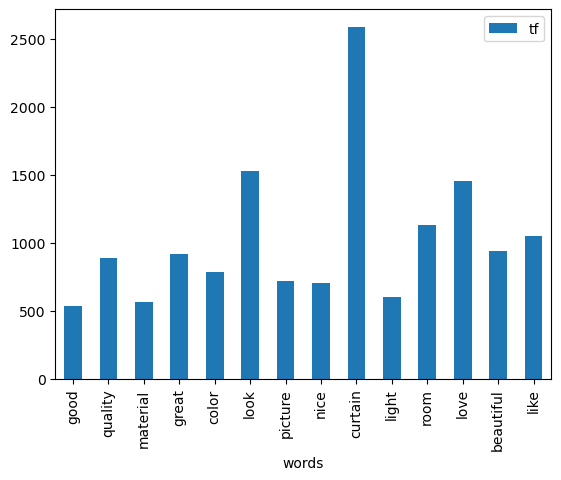

In [37]:
# Barplot
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

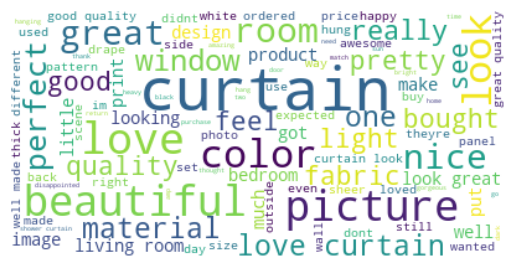

In [39]:
# Wordcloud
text = " ".join(i for i in df.Review)

wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...


True

In [45]:
sia = SentimentIntensityAnalyzer()

In [47]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.39
pos   4.59
Name: Star, dtype: float64

In [49]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [51]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [53]:
# Modelling(Logistic Regression)
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred = log_model.predict(x_test_tf_idf_word)

print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

         neg       0.33      0.90      0.49        82
         pos       0.99      0.89      0.94      1321

    accuracy                           0.89      1403
   macro avg       0.66      0.89      0.71      1403
weighted avg       0.95      0.89      0.91      1403



In [55]:
# Cross Validation
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8546034570411795

In [57]:
# Randomly selecting comments from the data and asking them to the model
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  light color defined pic 
 Prediction: ['neg']


In [59]:
# Modelling (Random Forest)
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.8902389425521099